<AxesSubplot:ylabel='label,target'>

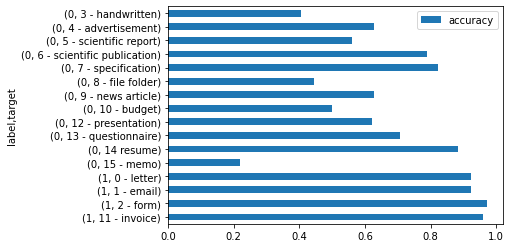

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from natsort import order_by_index, index_natsorted

def get_scores_for_target(df, target):
    df = df.where(df.target == target).dropna().reset_index(drop=True)
    outlier_labels = df.label
    outlier_preds = df.pred_class
    
    scores={}
    scores["label"] = int(df.label[0])
    scores["target"] = target 
    scores["accuracy"] = accuracy_score(
        outlier_labels, outlier_preds)
    return scores


files = ["/home/philipp/projects/dad4td/reports/supervised/best_pred_big.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df[["text", "target", "label", "pred"]]

remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}

df = df.replace({"target":remap})

threshold = 0.5
df["pred_class"] = np.where(df.pred > threshold, 1, 0)

targets = sorted(list(df.target.unique()))

df = pd.DataFrame([get_scores_for_target(df, target) for target in targets])
df = df.groupby(["label", "target"]).sum()
df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.iloc[::-1]
df_res = df
df.plot.barh(stacked=True)

# Weakly Supervised
Training: Normal inlier data, outlier data has one class with 0 or a low number of samples only

In [5]:
#files = ["/home/philipp/projects/dad4td/reports/supervised/one_new_outlier_weakly_w_in0001.tsv"]
files = ["/home/philipp/projects/dad4td/reports/supervised/one_new_outlier_weakly0001.tsv"]

df_results = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)

scores = ["accuracy", "f1_macro", "in_f1","in_prec", "in_rec", "out_f1","out_prec", "out_rec"]
df_results["test_outliers"] = df_results["test_outliers"].map(lambda x: eval(x)[0])

df_results = df_results.replace({"test_outliers":remap})

df = df_results
df = df.groupby(["test_outliers", "weakly_supervised"]).mean()
df = df.sort_values(by=["test_outliers", "weakly_supervised"])
df[scores]

accuracy  f1_macro  in_f1  \
test_outliers              weakly_supervised                              
10 - budget                0.0                0.069068  0.064417    0.0   
                           3.0                0.074461  0.069081    0.0   
                           5.0                0.065588  0.061361    0.0   
                           10.0               0.080028  0.073760    0.0   
                           50.0               0.132916  0.117087    0.0   
12 - presentation          0.0                0.241262  0.193494    0.0   
                           3.0                0.252344  0.200676    0.0   
                           5.0                0.250000  0.199290    0.0   
                           10.0               0.265985  0.209685    0.0   
                           50.0               0.288363  0.223184    0.0   
13 - questionnaire         0.0                0.109615  0.098357    0.0   
                           3.0                0.127885  0.112864    0.0   
                           5.0                0.137821  0.120783    0.0   
                           10.0               0.145673  0.126641    0.0   
                           50.0               0.225160  0.182112    0.0   
14 resume                  0.0                0.561388  0.357697    0.0   
                           3.0                0.584075  0.366096    0.0   
                           5.0                0.630042  0.385089    0.0   
                           10.0               0.650059  0.392777    0.0   
                           50.0               0.799526  0.443465    0.0   
15 - memo                  0.0                0.073973  0.068755    0.0   
                           3.0                0.061141  0.057423    0.0   
                           5.0                0.078050  0.072161    0.0   
                           10.0               0.077144  0.071480    0.0   
                           50.0               0.099308  0.089871    0.0   
4 - advertisement          0.0                0.320244  0.241824    0.0   
                           3.0                0.334642  0.248615    0.0   
                           5.0                0.320244  0.241435    0.0   
                           10.0               0.311518  0.236079    0.0   
                           50.0               0.383072  0.276248    0.0   
5 - scientific report      0.0                0.219411  0.179190    0.0   
                           3.0                0.218915  0.178822    0.0   
                           5.0                0.232308  0.187359    0.0   
                           10.0               0.244378  0.194804    0.0   
                           50.0               0.289352  0.223195    0.0   
6 - scientific publication 0.0                0.461883  0.315270    0.0   
                           3.0                0.499074  0.332109    0.0   
                           5.0                0.486574  0.326157    0.0   
                           10.0               0.511883  0.336696    0.0   
                           50.0               0.603549  0.375991    0.0   
7 - specification          0.0                0.052823  0.049722    0.0   
                           3.0                0.077717  0.070746    0.0   
                           5.0                0.068610  0.063765    0.0   
                           10.0               0.119156  0.104247    0.0   
                           50.0               0.361263  0.264115    0.0   
9 - news article           0.0                0.306849  0.232963    0.0   
                           3.0                0.283401  0.220368    0.0   
                           5.0                0.287449  0.221517    0.0   
                           10.0               0.318151  0.240331    0.0   
                           50.0               0.322706  0.243038    0.0   

                                              in_prec  in_rec    out_f1  \
test_outliers              weakly_supervised                          

,accuracy,f1_macro,in_f1,in_prec,in_rec,out_f1,out_prec,out_rec
test_outliers,,,,,,,,
10 - budget,0.069068,0.064417,0.0,0.0,0.0,0.128833,1.0,0.069068
12 - presentation,0.241262,0.193494,0.0,0.0,0.0,0.386988,1.0,0.241262
13 - questionnaire,0.109615,0.098357,0.0,0.0,0.0,0.196715,1.0,0.109615
14 resume,0.561388,0.357697,0.0,0.0,0.0,0.715395,1.0,0.561388
15 - memo,0.073973,0.068755,0.0,0.0,0.0,0.137509,1.0,0.073973
4 - advertisement,0.320244,0.241824,0.0,0.0,0.0,0.483648,1.0,0.320244
5 - scientific report,0.219411,0.179190,0.0,0.0,0.0,0.358380,1.0,0.219411
6 - scientific publication,0.461883,0.315270,0.0,0.0,0.0,0.630539,1.0,0.461883
7 - specification,0.052823,0.049722,0.0,0.0,0.0,0.099444,1.0,0.052823


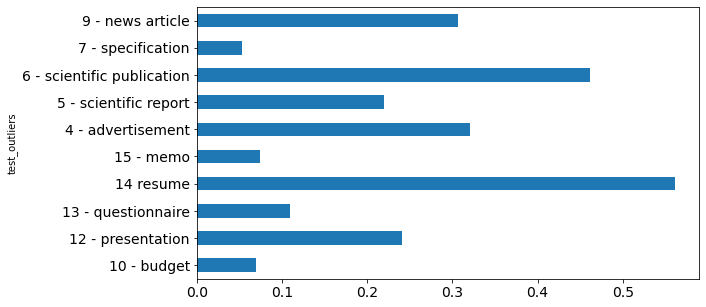

In [6]:
df = df_results
df = df.where(df.weakly_supervised == 0)
df = df.groupby(["test_outliers"]).mean()
df = df.sort_values(by=["test_outliers"])
df = df[scores]
df_res2 = df
df["accuracy"].plot.barh(stacked=True, figsize=(9,5), fontsize=14)
df

,target,accuracy_all_data,accuracy_unseen
0,15 - memo,0.219758,0.073973
1,14 resume,0.882591,0.561388
2,13 - questionnaire,0.707983,0.109615
3,12 - presentation,0.620087,0.241262
4,10 - budget,0.501062,0.069068
5,9 - news article,0.627572,0.306849
6,7 - specification,0.822811,0.052823
7,6 - scientific publication,0.789047,0.461883
8,5 - scientific report,0.560254,0.219411
9,4 - advertisement,0.628763,0.320244


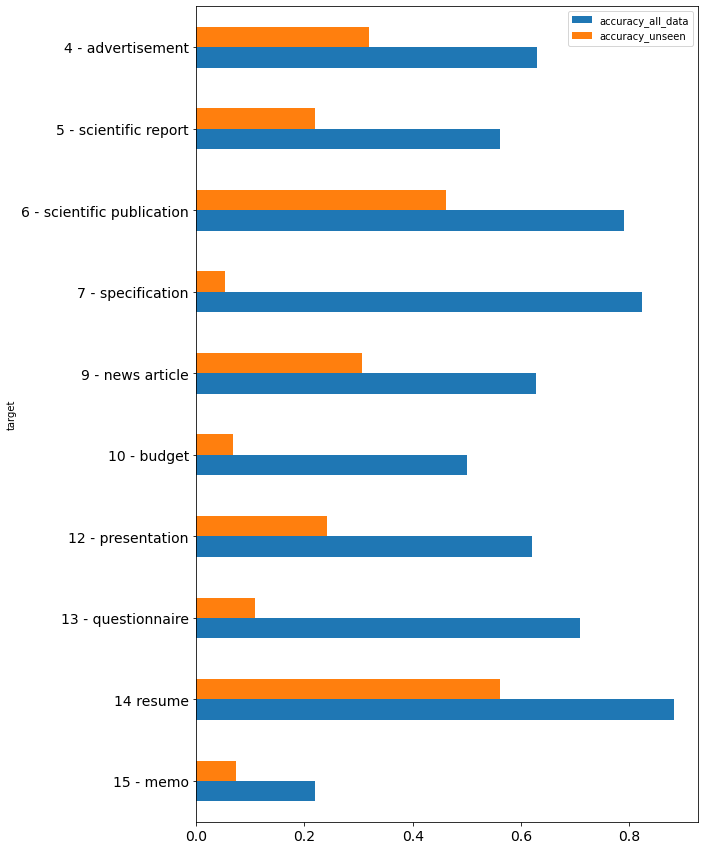

In [7]:
df_res1 = df_res.reset_index()
df_res1 = df_res1.where(df_res1.label ==0).dropna()
df_res1["accuracy_all_data"] = df_res1.accuracy
df_res1 = df_res1[["target", "accuracy_all_data"]]
df_res1

df_res3 = df_res2.reset_index()
df_res3["target"] = df_res3.test_outliers
df_res3["accuracy_unseen"] = df_res3.accuracy
df_res3 = df_res3[["target", "accuracy_unseen"]]
df_res3

df_res_comb = df_res1.merge(df_res3, on=["target"])
df_res_comb.plot.barh(stacked=False, figsize=(9,15), fontsize=14, x="target")
df_res_comb


## n - samples per weakly supervised class
This shows the influence of n samples per class on the results. Starts with 0 samples, which means the outlier class is unseen during training.

,accuracy,f1_macro,in_f1,in_prec,in_rec,out_f1,out_prec,out_rec
weakly_supervised,,,,,,,,
0.0,0.834049,0.615813,0.904736,0.850157,0.968226,0.326890,0.552628,0.245966
3.0,0.835328,0.619813,0.905455,0.851369,0.968426,0.334171,0.562377,0.253952
5.0,0.836925,0.625437,0.906295,0.852761,0.968474,0.344579,0.577454,0.261203
10.0,0.839455,0.632060,0.907695,0.855030,0.968856,0.356426,0.590248,0.273221
50.0,0.853235,0.673922,0.915034,0.868975,0.967903,0.432811,0.652936,0.345536


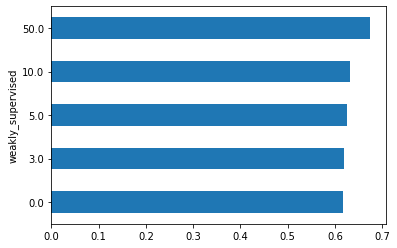

In [46]:
df = df_results
df = df.groupby(["weakly_supervised"]).mean()
df = df.sort_values(by=["test_outliers", "weakly_supervised"])
df = df[scores]
df["f1_macro"].plot.barh(stacked=True)
df

,accuracy,f1_macro,in_f1,in_prec,in_rec,out_f1,out_prec,out_rec
n_class,,,,,,,,
8000.0,0.273658,0.198694,0.0,0.0,0.0,0.397387,1.0,0.273658
20000.0,0.277498,0.201641,0.0,0.0,0.0,0.403282,1.0,0.277498


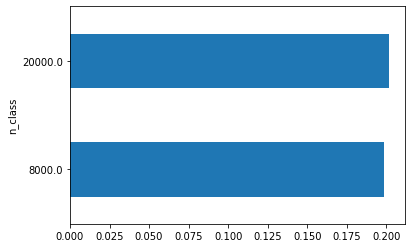

In [136]:
df = df_results
df = df.groupby(["n_class"]).mean()
df = df.sort_values(by=["n_class"])
df = df[scores]
df["f1_macro"].plot.barh(stacked=True)
df

## Outlier Exposure
Another attempt at using Outlier Exposure with marginal increases in the results.

,accuracy,f1_macro,in_f1,in_prec,in_rec,out_f1,out_prec,out_rec
n_oe,,,,,,,,
0.0,0.839383,0.631622,0.907629,0.855202,0.968467,0.355614,0.586039,0.272366
50.0,0.839604,0.633457,0.907723,0.855378,0.968435,0.359192,0.587537,0.275796
250.0,0.840408,0.635148,0.908177,0.856397,0.968228,0.362120,0.587810,0.279766


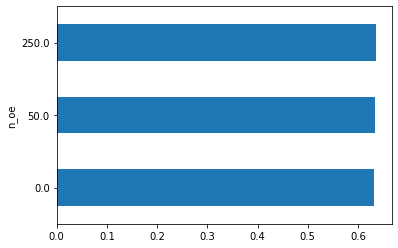

In [47]:
df = df_results
df = df.groupby(["n_oe"]).mean()
df = df.sort_values(by=["test_outliers", "weakly_supervised"])
df = df[scores]
df["f1_macro"].plot.barh(stacked=True)
df

# One to many
During training all inlier data but only one outlier class is known. From that we get prediction results for all other outlier classes.

outliers
10 - budget                   0.057151
12 - presentation             0.174656
13 - questionnaire            0.070368
14 resume                     0.043122
15 - memo                     0.096457
4 - advertisement             0.104411
5 - scientific report         0.212282
6 - scientific publication    0.165013
7 - specification             0.034632
9 - news article              0.137217
Name: accuracy, dtype: float64

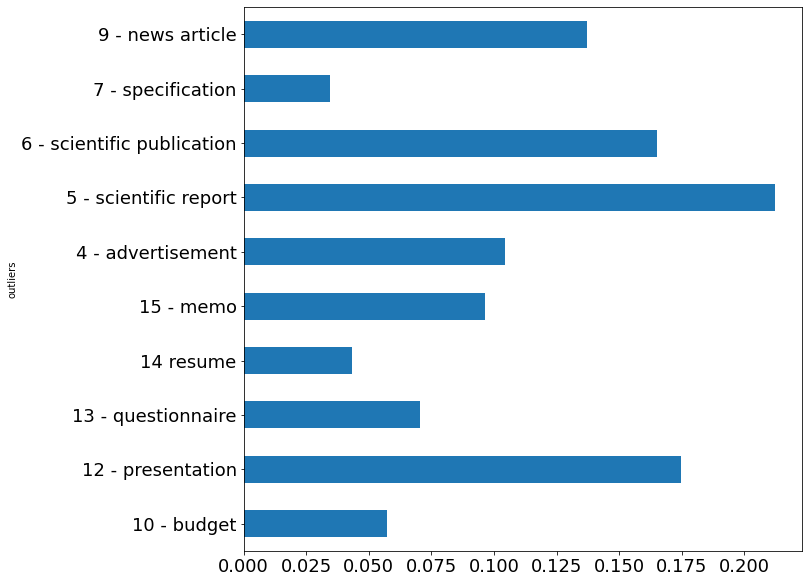

In [9]:
files = ["/home/philipp/projects/dad4td/reports/supervised/one_to_many_0001.tsv"]
df_results2 = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)

df_results2["outliers"] = df_results2["outliers"].map(lambda x: eval(x)[0])

df = df_results2
df = df.replace({"outliers":remap})
df = df.groupby(["outliers"]).mean()
df = df.sort_values(by=["outliers"])
df = df["accuracy"]
df_res4 = df
df.plot.barh(stacked=True, figsize=(10,10), fontsize=18)
df

,target,accuracy_all_data,accuracy_unseen,accuracy_as_predictor
0,15 - memo,0.219758,0.073973,0.096457
1,14 resume,0.882591,0.561388,0.043122
2,13 - questionnaire,0.707983,0.109615,0.070368
3,12 - presentation,0.620087,0.241262,0.174656
4,10 - budget,0.501062,0.069068,0.057151
5,9 - news article,0.627572,0.306849,0.137217
6,7 - specification,0.822811,0.052823,0.034632
7,6 - scientific publication,0.789047,0.461883,0.165013
8,5 - scientific report,0.560254,0.219411,0.212282
9,4 - advertisement,0.628763,0.320244,0.104411


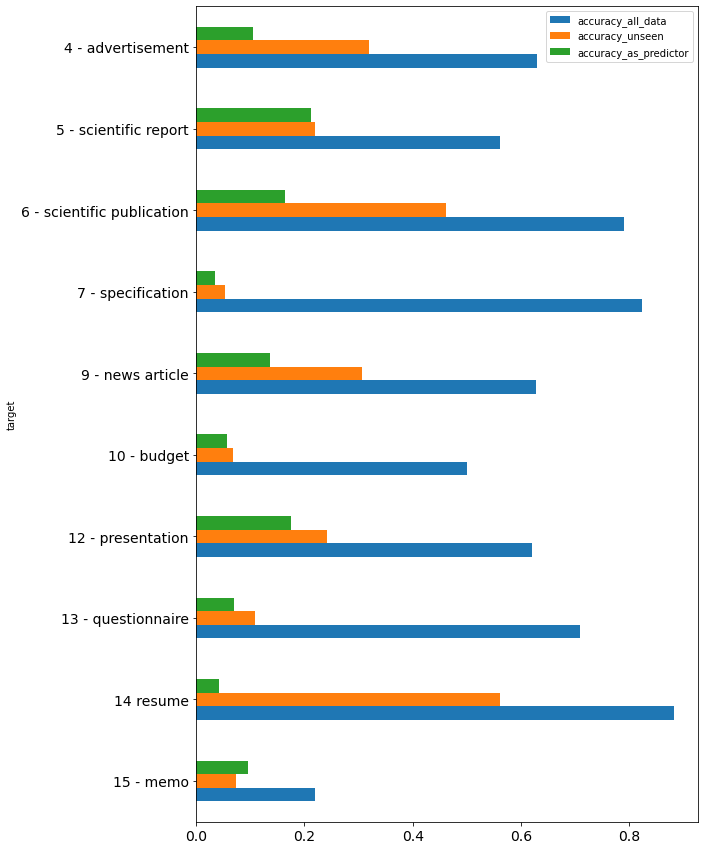

In [11]:
df_res5 = df_res4.reset_index()
df_res5["target"] = df_res5.outliers
df_res5["accuracy_as_predictor"] = df_res5.accuracy
df_res5 = df_res5[["target", "accuracy_as_predictor"]]
df_res5

df_res_comb2 = df_res1.merge(df_res3, on=["target"]).merge(df_res5, on=["target"])
df_res_comb2.plot.barh(stacked=False, figsize=(9,15), fontsize=14, x="target")
df_res_comb2

#df_res_comb.plot.barh(stacked=False, figsize=(9,15), fontsize=14, x="target")

## Normalized

,target,accuracy_all_data,accuracy_unseen,accuracy_as_predictor
0,15 - memo,0.248992,0.131769,0.454382
1,14 resume,1.000000,1.000000,0.203136
2,13 - questionnaire,0.802164,0.195258,0.331484
3,12 - presentation,0.702576,0.429759,0.822754
4,10 - budget,0.567717,0.123030,0.269220
5,9 - news article,0.711056,0.546590,0.646388
6,7 - specification,0.932267,0.094094,0.163143
7,6 - scientific publication,0.894012,0.822751,0.777329
8,5 - scientific report,0.634783,0.390837,1.000000
9,4 - advertisement,0.712405,0.570451,0.491850


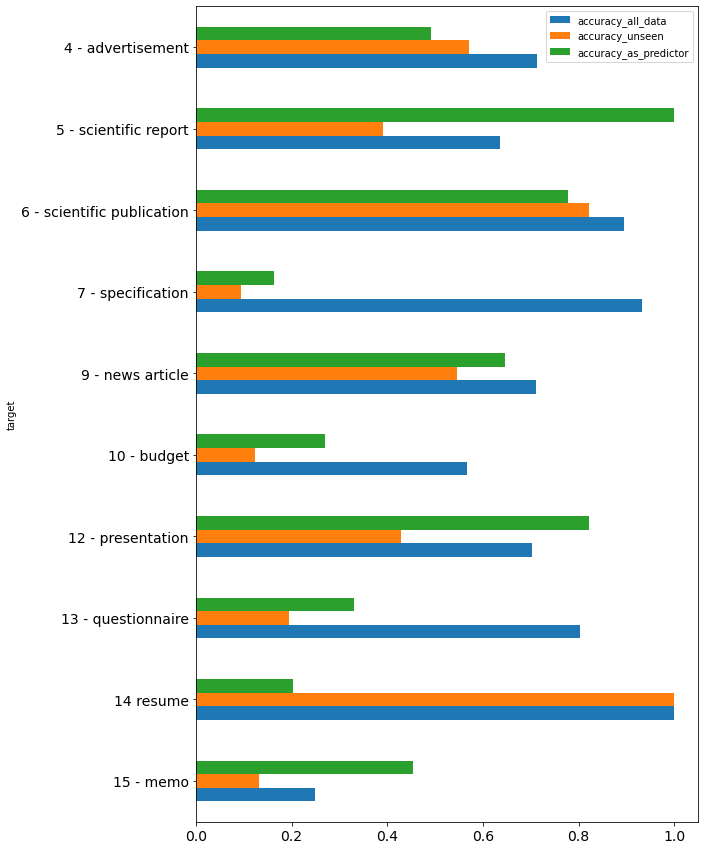

In [12]:
normalized_df=df_res_comb2
normalized_df.accuracy_all_data = normalized_df.accuracy_all_data / normalized_df.accuracy_all_data.max()
normalized_df.accuracy_unseen = normalized_df.accuracy_unseen / normalized_df.accuracy_unseen.max()
normalized_df.accuracy_as_predictor = normalized_df.accuracy_as_predictor / normalized_df.accuracy_as_predictor.max()
normalized_df.plot.barh(stacked=False, figsize=(9,15), fontsize=14, x="target")
normalized_df

,target,accuracy_all_data,accuracy_unseen,accuracy_one_class
0,15 - memo,0.219758,0.073973,0.318681
1,14 resume,0.882591,0.561388,0.989011
2,13 - questionnaire,0.707983,0.109615,0.816092
3,12 - presentation,0.620087,0.241262,0.703125
4,10 - budget,0.501062,0.069068,0.311111
5,9 - news article,0.627572,0.306849,0.779070
6,7 - specification,0.822811,0.052823,0.840909
7,6 - scientific publication,0.789047,0.461883,0.915663
8,5 - scientific report,0.560254,0.219411,0.395349
9,4 - advertisement,0.628763,0.320244,0.625000


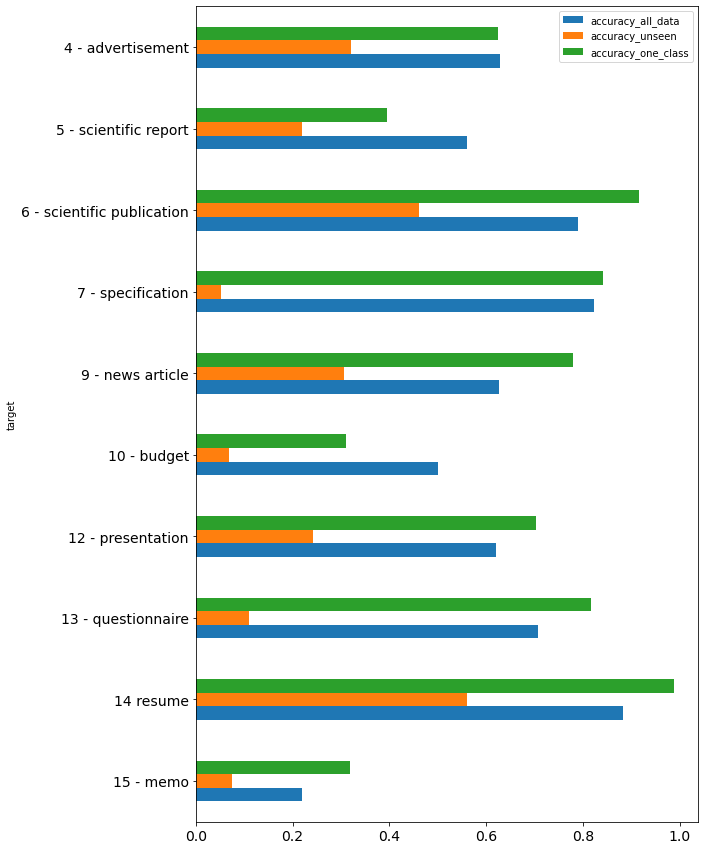

In [13]:
df_one_class = pd.read_csv("/home/philipp/projects/dad4td/reports/one_class/one_miss64.tsv", sep="\t")
df_one_class["target"] = df_one_class.cclass.map(lambda x: eval(x)[0])
df_one_class = df_one_class.rename(columns={"accuracy": "accuracy_one_class"})
df_one_class = df_one_class.replace({"target":remap})
df_res_comb_oc = df_res_comb.merge(df_one_class[["target", "accuracy_one_class"]])
df_res_comb_oc.plot.barh(stacked=False, figsize=(9,15), fontsize=14, x="target")
df_res_comb_oc
#df_one_class

,target,accuracy_all_data,accuracy_unseen,accuracy_one_class,accuracy_one_class_img
0,15 - memo,0.219758,0.073973,0.318681,0.020000
1,14 resume,0.882591,0.561388,0.989011,0.235294
2,13 - questionnaire,0.707983,0.109615,0.816092,0.000000
3,12 - presentation,0.620087,0.241262,0.703125,0.319149
4,10 - budget,0.501062,0.069068,0.311111,0.000000
5,9 - news article,0.627572,0.306849,0.779070,0.346939
6,7 - specification,0.822811,0.052823,0.840909,0.274510
7,6 - scientific publication,0.789047,0.461883,0.915663,0.692308
8,5 - scientific report,0.560254,0.219411,0.395349,0.019231
9,4 - advertisement,0.628763,0.320244,0.625000,0.375000


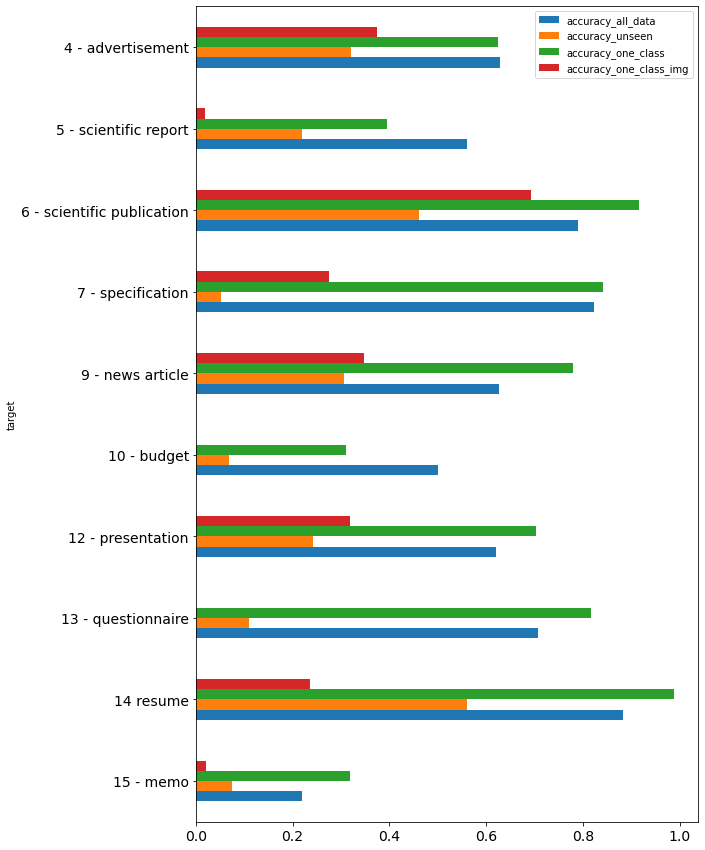

In [20]:
df_one_class_img = pd.read_csv("/home/philipp/projects/dad4td/reports/one_class/img_one_new.tsv", sep="\t")
df_one_class_img["target"] = df_one_class_img.cclass.map(lambda x: eval(x)[0])
df_one_class_img = df_one_class_img.rename(columns={"accuracy": "accuracy_one_class_img"})
df_one_class_img = df_one_class_img.replace({"target":remap})
df_res_comb_wimg = df_res_comb_oc.merge(df_one_class_img[["target", "accuracy_one_class_img"]])
df_res_comb_wimg.plot.barh(stacked=False, figsize=(9,15), fontsize=14, x="target")
df_res_comb_wimg